In [1]:
import os
import face_recognition
import pickle

def encode_faces(dataset_path):
    known_encodings = []
    known_names = []

    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            if file.endswith(("jpg", "jpeg", "png")):
                image_path = os.path.join(root, file)
                image = face_recognition.load_image_file(image_path)
                encodings = face_recognition.face_encodings(image)

                if encodings:
                    known_encodings.append(encodings[0])
                    known_names.append(os.path.basename(root))

    return known_encodings, known_names

dataset_path = "/Users/shivam/Face Detection/Celebrity Dataset New/"
known_encodings, known_names = encode_faces(dataset_path)

with open("encodings.pickle", "wb") as f:
    pickle.dump({"encodings": known_encodings, "names": known_names}, f)


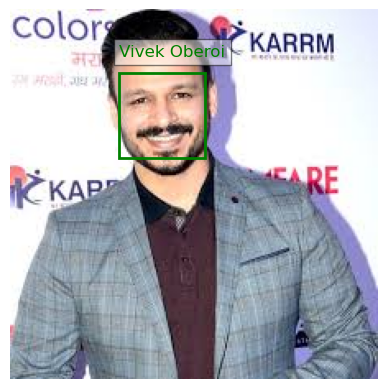

Vivek Oberoi


In [10]:
import face_recognition
import cv2
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load the known faces and encodings
with open("encodings.pickle", "rb") as f:
    data = pickle.load(f)

def recognize_celebrities(image_path, data):
    image = face_recognition.load_image_file(image_path)
    face_locations = face_recognition.face_locations(image)
    face_encodings = face_recognition.face_encodings(image, face_locations)

    names = []
    for encoding in face_encodings:
        matches = face_recognition.compare_faces(data["encodings"], encoding)
        name = "Unknown"

        face_distances = face_recognition.face_distance(data["encodings"], encoding)
        best_match_index = face_distances.argmin()

        if matches[best_match_index]:
            name = data["names"][best_match_index]

        names.append(name)

    return face_locations, names

def display_image_with_names(image_path, face_locations, names):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    fig, ax = plt.subplots()
    ax.imshow(image_rgb)
    
    for (top, right, bottom, left), name in zip(face_locations, names):
        rect = patches.Rectangle((left, top), right - left, bottom - top, linewidth=2, edgecolor='g', facecolor='none')
        ax.add_patch(rect)
        plt.text(left, top - 10, name, color='green', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
    
    plt.axis('off')
    plt.show()

# Input image path
input_image_path = "/Users/shivam/Downloads/vivek_test.jpg"
face_locations, names = recognize_celebrities(input_image_path, data)

# Display the result
display_image_with_names(input_image_path, face_locations, names)
print(names[0])


In [60]:
import face_recognition
import cv2
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Load the known faces and encodings
with open("encodings.pickle", "rb") as f:
    data = pickle.load(f)

def recognize_celebrities(image_path, data):
    image = face_recognition.load_image_file(image_path)
    face_locations = face_recognition.face_locations(image)
    face_encodings = face_recognition.face_encodings(image, face_locations)

    names = []
    similarities = []
    for encoding in face_encodings:
        matches = face_recognition.compare_faces(data["encodings"], encoding)
        name = "Unknown"
        similarity = 0

        face_distances = face_recognition.face_distance(data["encodings"], encoding)
        best_match_index = np.argmin(face_distances)

        if matches[best_match_index]:
            name = data["names"][best_match_index]
            similarity = (1 - face_distances[best_match_index]) * 100  # Convert distance to similarity percentage

        names.append(name)
        similarities.append(similarity)

    return face_locations, names, similarities

def display_image_with_names(image_path, face_locations, names, similarities, threshold=70):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    fig, ax = plt.subplots()
    ax.imshow(image_rgb)
    
    found = False
    for (top, right, bottom, left), name, similarity in zip(face_locations, names, similarities):
        if similarity >= threshold:
            rect = patches.Rectangle((left, top), right - left, bottom - top, linewidth=1, edgecolor='g', facecolor='none')
            ax.add_patch(rect)
            plt.text(left, top - 10, f"{name}", color='green', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
            found = True
    
    if found:
        plt.axis('off')
        plt.show()
        print(names[0], "->",similarities[0],"Similarity")
    else:
        plt.close()
        print("Sorry, this person is not in the database")

# Input image path
input_image_path = "/Users/shivam/Downloads/Cat lazy.jpeg"
face_locations, names, similarities = recognize_celebrities(input_image_path, data)

# Display the result
display_image_with_names(input_image_path, face_locations, names, similarities)


Sorry, this person is not in the database
